<a href="https://colab.research.google.com/github/leonard-sanya/mini_project/blob/main/MLFC_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#***ACCESS MODULES***



### 1.0 Install and Import Libraries & Legal Copyright

In [2]:
%%capture
%pip install pandas
%pip install pandas openpyxl
%pip uninstall --yes fynesse
%pip install git+https://github.com/leonard-sanya/mini_project.git
%pip install osmnx

In [3]:
import os, subprocess, importlib, sys

def load_repo(repo):
    local = repo.split("/")[-1]
    if not os.path.exists(local):
        subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
    else:
        subprocess.run(["git", "-C", local, "pull"], check=True)
    if local not in sys.path:
        sys.path.insert(0, local)
    mod = importlib.import_module(local)
    importlib.reload(mod)
    return mod
fynesse = load_repo("leonard-sanya/mini_project")

In [4]:
import requests
import pandas as pd
from google.colab import files
import geopandas as gpd


import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# import pandas as pd
# import osmnx as ox
# import requests
# import geopandas as gpd
# import sys

import fynesse

In [5]:
fynesse.access.show_license()


                       MIT License
    Copyright (c) 2025 Leonard Sanya

    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHE

### 1.1 Downloading Data

In this project, we will be working with three main datasets that form the foundation of our analysis:

### 1.



### 2. Population Dataset (2019 Kenya Census)

* **Source**: Kenya National Bureau of Statistics (via HDX or uploaded CSV).
* **Description**: Population by county from the 2019 census.
* **Access Method**: Manual CSV upload to Google Colab (since direct link can be unstable).


### 3. Kenya County Boundaries (GeoJSON)

* **Source**: [Humanitarian Data Exchange (HDX)](https://data.humdata.org/)
* **Description**: GeoJSON shapefile with county boundaries in Kenya.
* **Access Method**: Direct download via URL.


In [6]:
def load_datasets(name):
    print(f" Please upload the {name} CSV file")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    # Try reading with encoding fallback
    try:
        df = pd.read_csv(file_name)
    except UnicodeDecodeError:
        df = pd.read_csv(file_name, encoding="ISO-8859-1")

    print(f"{name} dataset loaded:", df.shape)
    print(' ')
    return df




In [7]:
df_health_facilities = load_datasets('Health facility')
df_disaster_inventory = load_datasets('Disaster inventory')
df_population = load_datasets('Population Census')

 Please upload the Health facility CSV file


Saving healthcare_facilities.csv to healthcare_facilities (1).csv
Health facility dataset loaded: (10013, 13)
 
 Please upload the Disaster inventory CSV file


Saving national_natural_disaster_inventory.csv to national_natural_disaster_inventory (1).csv
Disaster inventory dataset loaded: (1371, 43)
 
 Please upload the Population Census CSV file


Saving 2019-population_census-report-per-county.csv to 2019-population_census-report-per-county (1).csv
Population Census dataset loaded: (47, 11)
 


In [8]:
# Load or upload Kenya counties GeoJSON
geojson_url = "https://data.humdata.org/dataset/37395f3e-8c07-4a34-bc8b-4f25a6e2d4c8/resource/63b53aa0-62f0-4a0c-8bc2-9e6a87b0af3b/download/kenya-counties.geojson"
try:
    gdf_counties = gpd.read_file(geojson_url)
    print("GeoJSON loaded online with", gdf_counties.shape[0], "counties")
except Exception as e:
    print("Online GeoJSON failed, please upload a local file instead.")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    gdf_counties = gpd.read_file(filename)
    print("GeoJSON loaded locally with", gdf_counties.shape[0], "counties")



Online GeoJSON failed, please upload a local file instead.


Saving kenya.geojson to kenya (1).geojson
GeoJSON loaded locally with 48 counties


In [9]:
print("\n Population dataset preview:")
display(df_population.head())

print("\n Health facility dataset preview:")
display(df_health_facilities.head())

print(' ')
print("\n Disaster Inventory dataset preview:")
display(df_disaster_inventory.head())

print(' ')
print("\n GeoJSON dataset preview:")
display(gdf_counties.head())


 Population dataset preview:


,County,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35
3,Busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28
4,Elgeyo-Marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12



 Health facility dataset preview:


,OBJECTID,Facility_N,Type,Owner,County,Sub_County,Division,Location,Sub_Locati,Constituen,Nearest_To,Latitude,Longitude
0,1,CDF Kiriari Dispensary,Dispensary,Ministry of Health,Embu,Manyatta,Manyatta,Ruguru,Ruguru,MANYATTA,Kiriari -market,-0.39940,37.47605
1,2,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,Nairobi,Mathare,Huruma,Huruma,Huruma,MATHARE,Kariobangi Market,-1.26174,36.87765
2,3,12 Engineers,Dispensary,Ministry of Health,Kiambu,Thika West,,,,JUJA,,-1.07354,37.14413
3,4,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,Kajiado,Kajiado North,Ongata Rongai,Gataka,Gataka,KAJIADO NORTH,Ongata Ronga,-1.37570,36.72277
4,5,8Th Street Clinic,Medical Clinic,Private Enterprise (Institution),Kajiado,Kajiado North,Isinya,Isinya,Isinya Township,KAJIADO NORTH,Isinya,-1.41187,36.50854


 

 Disaster Inventory dataset preview:


,objectid,event_,county_,district_,division_,date_,place,deaths_,injured_,missing_,...,other_responders_,house__iron_sheet_,house__wooden_,house__mud_,house__grass_thatched_,house__tent_,x,y,constituency_gis,county_centriod
0,1001,FLOOD,WAJIR,Wajir North,WAJIR-BOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.006965,40.535670,WAJIR WEST,"(1.80813762380, 40.03498563960)"
1,1002,DROUGHT,MANDERA,MANDERA,WARGADUD,NaN,Wargadud village,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.068411,40.636267,MANDERA SOUTH,"(3.43646948803, 40.73881016670)"
2,1003,FOREST FIRE,NAIROBI,NAIROBI,WESTLANDS,NaN,Karura forest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.241644,36.783359,KAMUKUNJI,"(-1.29341347028, 36.86818926820)"
3,1004,DROUGHT,NAIROBI,NAIROBI,WESTLANDS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.241644,36.783359,KAMUKUNJI,"(-1.29341347028, 36.86818926820)"
4,1005,FLOOD,NAIROBI,NAIROBI,WESTLANDS,NaN,Kitisuru,NaN,NaN,NaN,...,GOK,NaN,NaN,NaN,NaN,NaN,-1.241644,36.783359,KAMUKUNJI,"(-1.29341347028, 36.86818926820)"


 

 GeoJSON dataset preview:


,OBJECTID,ID_,COUNTY_NAM,CONST_CODE,CONSTITUEN,COUNTY_COD,Shape_Leng,Shape_Area,geometry
0,1,5543,NAIROBI,288,KAMUKUNJI,47,1.559787,0.057423,"POLYGON ((36.90458 -1.16071, 36.90809 -1.16157..."
1,2,6634,MOMBASA,3,KISAUNI,1,0.885586,0.023325,"POLYGON ((39.68311 -4.06074, 39.68091 -4.06233..."
2,3,6600,KWALE,10,KINANGO,2,4.284182,0.758266,"POLYGON ((39.32093 -3.57045, 39.31934 -3.57515..."
3,4,6731,KILIFI,13,KALOLENI,3,5.333080,1.025338,"POLYGON ((39.71113 -3.91115, 39.70691 -3.91157..."
4,5,5806,TANA RIVER,19,GALOLE,4,10.280449,3.184213,"POLYGON ((39.02814 -0.00398, 39.03632 -0.00416..."


In [10]:
# Create dictionary from health facilities DataFrame

# df_health_facilities_2 = df_health_facilities.iloc[:10,:]
facility_dict = {
    f"{row['Facility_N']}, {row['County']}": {
        "latitude": row["Latitude"],
        "longitude": row["Longitude"]
    }
    for _, row in df_health_facilities.iterrows()
}

# Preview the first 5 entries
for k, v in list(facility_dict.items())[:5]:
    print(k, ":", v)


 CDF Kiriari Dispensary, Embu : {'latitude': -0.3994, 'longitude': 37.47605}
 St Jude's Huruma Community Health Services, Nairobi : {'latitude': -1.26174, 'longitude': 36.87765}
12 Engineers, Kiambu : {'latitude': -1.07354, 'longitude': 37.14413}
3Kl Maternity & Nursing Home, Kajiado : {'latitude': -1.3757, 'longitude': 36.72277}
8Th Street Clinic, Kajiado : {'latitude': -1.41187, 'longitude': 36.50854}


In [13]:
import osmnx as ox
import pandas as pd


features = [
    # ("building", None),
    # ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    # ("shop", None),
    # ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    # ("leisure", None),
    ("leisure", "park"),
    # ("historic", None),
    ("amenity", "place_of_worship"),
]

def get_feature_vector(latitude, longitude, box_size_km=2, features=None, all_features=None):
    """
    Return a consistent feature vector as a dict, even if OSM query fails
    or no features are found.
    """
    # Construct bbox
    box_width = box_size_km / 111
    box_height = box_size_km / 111
    north = latitude + box_height
    south = latitude - box_height
    west = longitude - box_width
    east = longitude + box_width
    bbox = (west, south, east, north)

    # Build tags dictionary
    tags = {k: True for k, _ in features} if features else {}

    # Master feature list for consistent schema
    if all_features is None:
        all_features = [f"{k}:{v}" if v else k for k, v in features]

    try:
        pois = ox.features_from_bbox(bbox, tags)

        if pois is None or pois.empty:
            print("[Info] No features found, returning zero vector.")
            return {feat: 0 for feat in all_features}

        pois_df = pois.reset_index()
        print(f"[Info] Retrieved {len(pois_df)} features from OSM.")

    except Exception as e:
        print(f"[Warning] OSM query failed: {e}")
        return {feat: 0 for feat in all_features}

    feature_vec = {feat: 0 for feat in all_features}
    for key, value in features:
        col_name = f"{key}:{value}" if value else key
        if key in pois_df.columns:
            if value:
                feature_vec[col_name] = pois_df[key].astype(str).str.lower().eq(str(value).lower()).sum()
            else:
                feature_vec[col_name] = pois_df[key].notna().sum()

    return feature_vec

def build_feature_dataframe(facility_dicts, features, box_size_km=1):
    results = {}

    for facility, coords in facility_dicts.items():
        vec = get_feature_vector(
            coords["latitude"],
            coords["longitude"],
            box_size_km=box_size_km,
            features=features
        )

        # Extract County from facility name (assumes "Facility, County")
        if "," in facility:
            county = facility.split(",")[-1].strip()
        else:
            county = "Unknown"

        vec["County"] = county

        # Store results indexed by County
        results[facility] = vec

    df = pd.DataFrame(results).T
    return df


In [ ]:
import time
import pandas as pd

# Measure start time
start_time = time.time()

# Build the dataframe (your code)
geo_features_county_1km = build_feature_dataframe(facility_dicts=facility_dict, features=features, box_size_km=1)

# Measure end time
end_time = time.time()
print(f"Time taken to build dataframe: {end_time - start_time:.2f} seconds")

# Use only first 2 features and first 2 facilities
# geo_features_county_small = build_feature_dataframe(
#     facility_dicts=facility_dict,
#     features=features,
#     box_size_km=1
# )
# geo_features_county_small.head()

[Warning] OSM query failed: No matching features. Check query location, tags, and log.
[Info] Retrieved 444 features from OSM.
[Info] Retrieved 1 features from OSM.
[Info] Retrieved 6 features from OSM.
[Info] Retrieved 1 features from OSM.
[Info] Retrieved 52 features from OSM.
[Info] Retrieved 743 features from OSM.
[Info] Retrieved 384 features from OSM.
[Info] Retrieved 125 features from OSM.
[Info] Retrieved 381 features from OSM.
[Info] Retrieved 76 features from OSM.
[Info] Retrieved 406 features from OSM.
[Info] Retrieved 58 features from OSM.
[Warning] OSM query failed: No matching features. Check query location, tags, and log.
[Info] Retrieved 212 features from OSM.
[Info] Retrieved 96 features from OSM.
[Warning] OSM query failed: No matching features. Check query location, tags, and log.
[Warning] OSM query failed: No matching features. Check query location, tags, and log.
[Info] Retrieved 86 features from OSM.
[Info] Retrieved 19 features from OSM.
[Info] Retrieved 4 featu

In [ ]:
X = geo_features_county_1km.drop(columns="County")  # Features
y = geo_features_county_1km["County"]  # Target

# Save to CSV
csv_path = "/content/drive/MyDrive/saved_data/geo_features_county_1km.csv"  # adjust path if needed
df_disaster_inventory.to_csv(csv_path, index=False)
print(f"DataFrame saved to {csv_path}")


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Run PCA
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)

plt.figure(figsize=(10, 8))

# Scatter plot colored by County
unique_counties = df["County"].unique()
colors = plt.cm.tab20.colors  # up to 20 distinct colors

for i, county in enumerate(unique_counties):
    mask = (df["County"] == county)
    plt.scatter(
        X_proj[mask, 0],
        X_proj[mask, 1],
        label=county,
        color=colors[i % len(colors)],
        s=10,
        alpha=0.7
    )

# # Add labels for each point
# for i, label in enumerate(df.index):
#     plt.text(X_proj[i, 0] + 0.02, X_proj[i, 1], label, fontsize=7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D Projection of Facility Feature Vectors by County")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


## Standardizing County Columns Across Datasets

When working with multiple datasets, especially from different sources, **column names for the same data field may vary**. For example, the column representing counties could be labeled as:

* `"County"`
* `"COUNTY_NAM"`
* `"county_"`

To ensure consistency across all datasets, we define a function called `standardize_county_column`.

### How it works:

1. **Iterate through all columns** in the given DataFrame `df`.
2. **Compare column names** (case-insensitive, trimmed of spaces) with a list of `possible_names` that might represent a county column.
3. **Rename the first matching column** to `"county"`.
4. **Standardize the values** in this column:

   * Convert to string (`astype(str)`)
   * Remove leading/trailing spaces (`str.strip()`)
   * Capitalize each word (`str.title()`)
5. **Return the updated DataFrame**.
6. If no matching column is found, it prints a message indicating which columns were present.


This ensures smooth integration across **population, health facilities, counties shapefile, and disaster inventory datasets**, which is crucial for **flood risk mapping and analysis in Kenya**.


In [ ]:
def standardize_county_column(df, possible_names):
    """
    Renames the first matching county column to 'county'
    """
    for col in df.columns:
        if col.strip().lower() in [name.lower() for name in possible_names]:
            df.rename(columns={col: "county"}, inplace=True)
            df["County"] = df["county"].astype(str).str.strip().str.title()
            return df
    print(" No county column found in:", df.columns.tolist())
    return df

# Apply to all datasets
possible_names = ["County", "COUNTY_NAM",'county_']
df_population = standardize_county_column(df_population,possible_names )
df_health_facilities = standardize_county_column(df_health_facilities,possible_names )
gdf_counties = standardize_county_column(gdf_counties, possible_names)
df_disaster_inventory = standardize_county_column(df_disaster_inventory, possible_names)

## Cleaning County Name Mismatches

Multiple datasets may not always have matching **county names** due to:

* Typos
* Different spellings (e.g., dashes, spaces)
* Case differences

These inconsistencies can cause problems when **merging datasets or mapping geospatial data**.


In [ ]:
print("\n Harmonizing county names...")

# Find mismatches
df_population_counties = set(df_population["County"].unique())
health_facilities_counties = set(df_health_facilities["County"].unique())
disaster_inventory_counties = set(df_disaster_inventory["County"].unique())
geo_counties = set(gdf_counties["County"].unique())

mismatches_health = health_facilities_counties - geo_counties
mismatches_disaster = health_facilities_counties - geo_counties
mismatches_population = df_population_counties - geo_counties

print(" Counties in population but not in GeoJSON:", mismatches_population)
print(' ')

print(" Counties in health_facilities but not in GeoJSON:", mismatches_health)
print(' ')

print(" Counties in disaster_inventory but not in GeoJSON:", mismatches_disaster)
print(' ')



 Harmonizing county names...
 Counties in population but not in GeoJSON: {'Tharaka-Nithi', 'Elgeyo-Marakwet'}
 
 Counties in health_facilities but not in GeoJSON: set()
 
 Counties in disaster_inventory but not in GeoJSON: set()
 


In [ ]:
county_name_mapping = {
    'Tharaka Nithi': 'Tharaka - Nithi',
    'Tharaka-Nithi': 'Tharaka - Nithi',
    'Elgeyo Marakwet':'Elegeyo-Marakwet',
    'Elgeyo-Marakwet':'Elegeyo-Marakwet',
    'Murang\'a':'Murang\'A'}

df_health_facilities["County"] = df_health_facilities["County"].replace(county_name_mapping)
df_disaster_inventory["County"] = df_disaster_inventory["County"].replace(county_name_mapping)

In [ ]:
# df_health_facilities[df_health_facilities['Type'].isin(['Sub-District Hospital','Provincial General Hospital','National Referral Hospital'])]

In [ ]:
%%capture
!pip install contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

## Mapping Health Facilities on Kenya’s County Boundaries

This code visualizes the locations of health facilities in Kenya over the county boundaries using GeoPandas and an OpenStreetMap basemap.

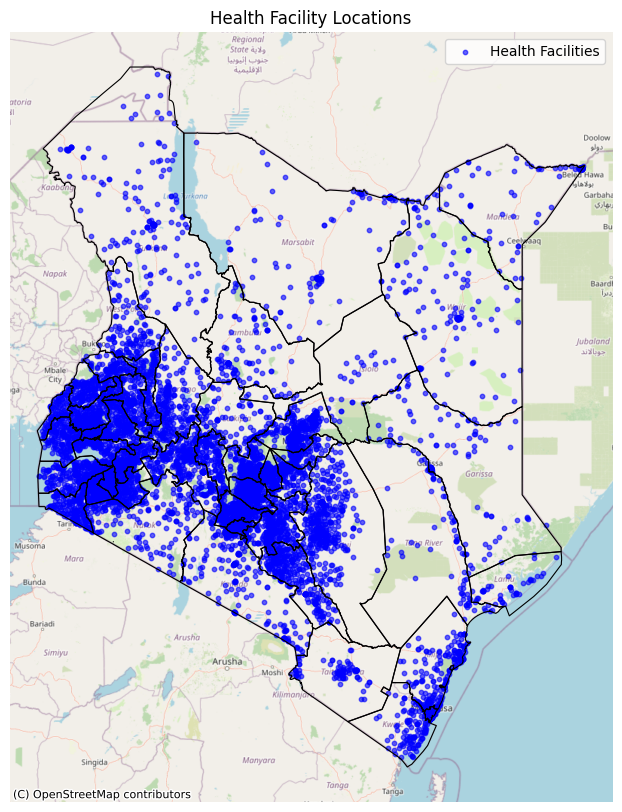

In [ ]:
gdf_facilities = gpd.GeoDataFrame(
    df_health_facilities,
    geometry=gpd.points_from_xy(df_health_facilities['Longitude'], df_health_facilities['Latitude']),
    crs="EPSG:4326"
)

gdf_counties = gdf_counties.to_crs(epsg=3857)
gdf_facilities = gdf_facilities.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(10, 10))
gdf_counties.boundary.plot(ax=ax, color="black", linewidth=0.8)

gdf_facilities.plot(
    ax=ax,
    color="blue",
    markersize=10,
    alpha=0.6,
    label="Health Facilities"
)

ctx.add_basemap(ax, crs=gdf_counties.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Health Facility Locations", fontsize=12)
ax.axis("off")
ax.legend()

plt.show()


In [ ]:
# G = ox.graph_from_place("Nyeri, Kenya", network_type="drive")

# fig, ax = ox.plot_graph(
#     G,
#     show=False,
#     close=False,
#     figsize=(10, 10),
#     node_size=0,
#     edge_color="gray",
#     edge_linewidth=0.4,
# )

# filtered_health_facilities = df_health_facilities[df_health_facilities["County"] == "Nyeri"]
# gdf_facilities = gpd.GeoDataFrame(
#     filtered_health_facilities,
#     geometry=gpd.points_from_xy(filtered_health_facilities['Longitude'], filtered_health_facilities['Latitude']),
#     crs="EPSG:4326"
# )

# # Plot health facilities
# gdf_facilities.plot(
#     ax=ax,
#     color="red",
#     markersize=5,
#     alpha=0.7,
#     label="Health Facilities"
# )

# # 5. Add title and legend
# ax.set_title("Health Facilities vs Road Network in Nyeri", fontsize=12)
# ax.legend()

# plt.show()


## Mapping Health Facilities by Type in Kenya

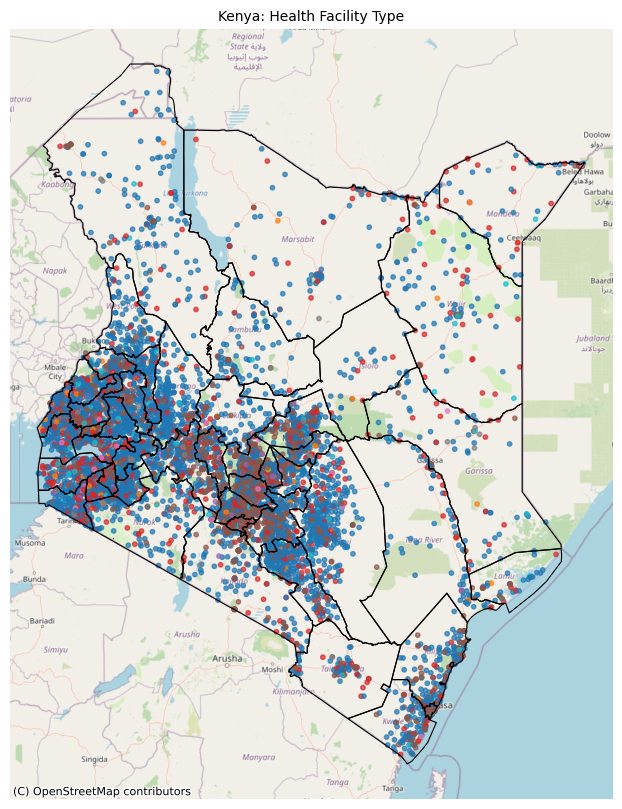

In [ ]:
gdf_facilities = gpd.GeoDataFrame(
    df_health_facilities,
    geometry=gpd.points_from_xy(df_health_facilities['Longitude'], df_health_facilities['Latitude']),
    crs="EPSG:4326" )

gdf_counties = gdf_counties.to_crs(epsg=3857)
gdf_facilities = gdf_facilities.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_counties.boundary.plot(ax=ax, color="black", linewidth=0.8)

gdf_facilities.plot(
    ax=ax,
    column="Type",
    categorical=True,
    legend=False,
    markersize=10,
    alpha=0.7,
    cmap="tab10"
)

ctx.add_basemap(ax, crs=gdf_counties.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Kenya: Health Facility Type", fontsize=10)
ax.axis("off")

plt.show()


## Mapping Reported Flood Events in Kenya

This visualizes reported flood events in Kenya by plotting them over county boundaries using GeoPandas and an OpenStreetMap basemap. First, it filters the disaster inventory dataset to include only flood events, then converts these points into a GeoDataFrame using latitude (`y`) and longitude (`x`) coordinates with a WGS84 CRS.

The map displays county outlines in black and flood events as semi-transparent red points, with an OSM basemap added for geographic context.


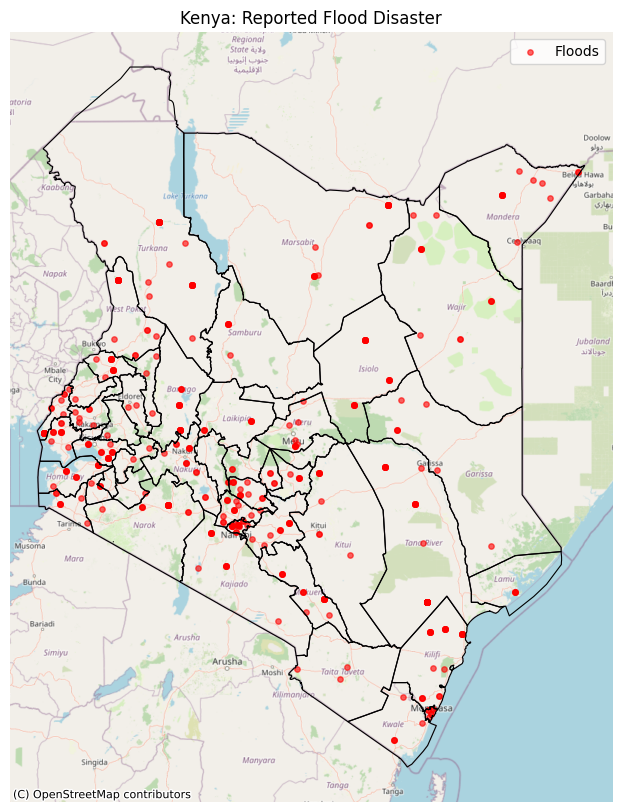

In [ ]:
df_floods = df_disaster_inventory[df_disaster_inventory['event_'] == 'FLOOD']

gdf_floods = gpd.GeoDataFrame(
    df_floods,
    geometry=gpd.points_from_xy(df_floods['y'], df_floods['x']),  # swap
    crs="EPSG:4326"
)

gdf_counties = gdf_counties.to_crs(epsg=3857)
gdf_floods = gdf_floods.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_counties.boundary.plot(ax=ax, color="black", linewidth=0.8)

gdf_floods.plot(
    ax=ax,
    color="red",
    markersize=15,
    alpha=0.6,
    label="Floods"
)

ctx.add_basemap(ax, crs=gdf_counties.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Kenya: Reported Flood Disaster", fontsize=12)
ax.axis("off")
ax.legend()

plt.show()


       County  Population Density  \
0     Nairobi              6247.0   
1     Mombasa              5495.0   
2       Kwale               105.0   
3      Kilifi               116.0   
4  Tana River                 8.0   

                                            geometry  flood_count  \
0  POLYGON ((4108199.342 -129218.251, 4108589.374...           21   
1  POLYGON ((4417503.679 -452418.746, 4417259.081...            7   
2  POLYGON ((4377185.695 -397717.893, 4377009.04 ...            6   
3  POLYGON ((4420622.31 -435725.282, 4420153.496 ...           34   
4  POLYGON ((4344592.946 -443.078, 4345503.396 -4...           68   

   hospital_count  pop_per_hospital  flood_vulnerability_index  
0             857          7.289382                 153.077013  
1             306         17.957516                 125.702614  
2             116          0.905172                   5.431034  
3             254          0.456693                  15.527559  
4              74          0.108108  

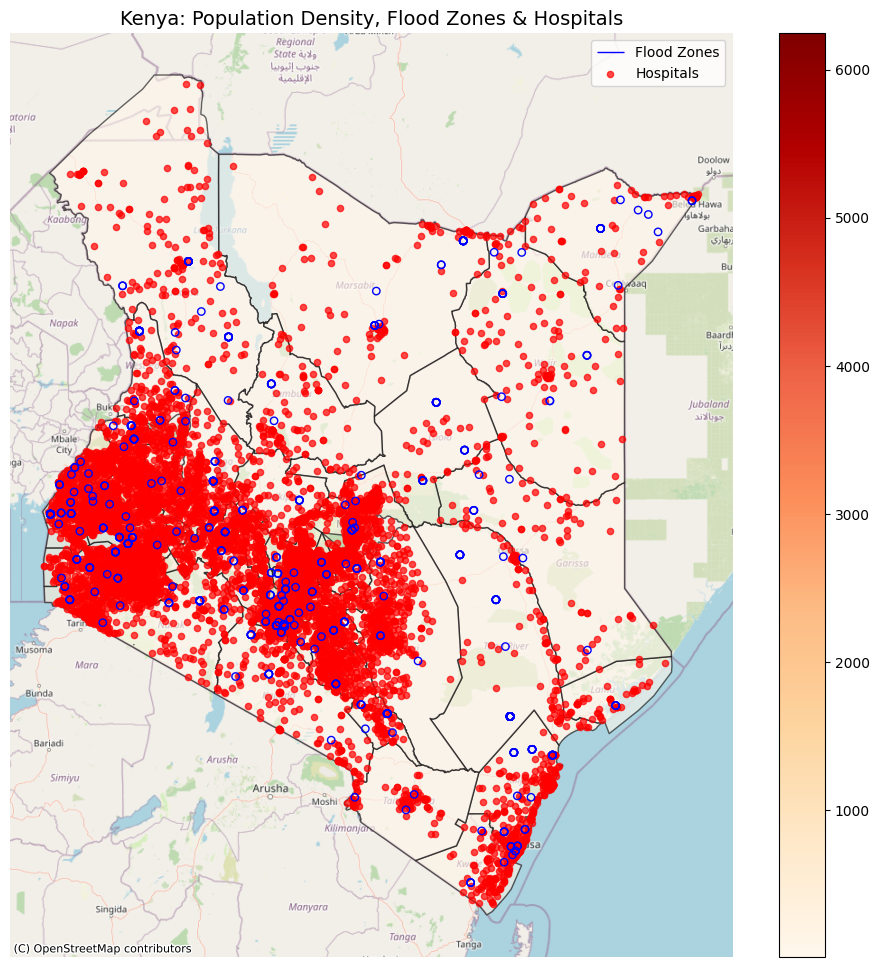

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import numpy as np

# -----------------------------
# 1. LOAD DATA
# -----------------------------
# Assuming gdf_counties, df_disaster_inventory, df_health_facilities, and df_population are already loaded

# Filter floods from disaster inventory
df_floods = df_disaster_inventory[df_disaster_inventory['event_'] == 'FLOOD']

# Flood points -> GeoDataFrame
gdf_floods = gpd.GeoDataFrame(
    df_floods,
    geometry=gpd.points_from_xy(df_floods['y'], df_floods['x']),  # check if swap needed!
    crs="EPSG:4326"
)

# Standardize county column
if 'county' in gdf_floods.columns:
    gdf_floods.rename(columns={'county': 'County'}, inplace=True)
elif 'COUNTY_NAM' in gdf_floods.columns:
    gdf_floods.rename(columns={'COUNTY_NAM': 'County'}, inplace=True)

# Health facilities -> GeoDataFrame
gdf_hospitals = gpd.GeoDataFrame(
    df_health_facilities,
    geometry=gpd.points_from_xy(df_health_facilities['Longitude'], df_health_facilities['Latitude']),
    crs="EPSG:4326"
)

if 'county' in gdf_hospitals.columns:
    gdf_hospitals.rename(columns={'county': 'County'}, inplace=True)
elif 'COUNTY_NAM' in gdf_hospitals.columns:
    gdf_hospitals.rename(columns={'COUNTY_NAM': 'County'}, inplace=True)

# Merge population data into counties
gdf_counties_with_pop = gdf_counties.merge(
    df_population[['County', 'Population Density']], on="County", how="left"
)

# Clean population density values
gdf_counties_with_pop['Population Density'] = pd.to_numeric(
    gdf_counties_with_pop['Population Density'].astype(str).str.replace(',', ''), errors='coerce'
)

# -----------------------------
# 2. REPROJECT TO METRIC CRS (Web Mercator for basemap)
# -----------------------------
gdf_counties_with_pop = gdf_counties_with_pop.to_crs(epsg=3857)
gdf_floods = gdf_floods.to_crs(epsg=3857)
gdf_hospitals = gdf_hospitals.to_crs(epsg=3857)

# -----------------------------
# 3. CREATE FLOOD BUFFERS (5 km)
# -----------------------------
gdf_floods['geometry'] = gdf_floods.buffer(5000)  # 5 km

# -----------------------------
# 4. SPATIAL JOINS
# -----------------------------
# Floods inside counties
floods_in_counties = gpd.sjoin(
    gdf_floods, gdf_counties_with_pop, how="left", predicate="intersects"
).rename(columns={"County_right": "County"})

# Hospitals inside counties
hospitals_in_counties = gpd.sjoin(
    gdf_hospitals, gdf_counties_with_pop, how="left", predicate="within"
).rename(columns={"County_right": "County"})

# -----------------------------
# 5. SUMMARY TABLE
# -----------------------------
flood_counts = floods_in_counties.groupby("County").size()
hospital_counts = hospitals_in_counties.groupby("County").size()

summary = gdf_counties_with_pop[['County', 'Population Density', 'geometry']].copy()
summary["flood_count"] = summary["County"].map(flood_counts).fillna(0).astype(int)
summary["hospital_count"] = summary["County"].map(hospital_counts).fillna(0).astype(int)
summary["pop_per_hospital"] = (
    summary["Population Density"] / summary["hospital_count"].replace(0, np.nan)
)

# Optional: Flood Vulnerability Index
summary["flood_vulnerability_index"] = (
    summary["Population Density"] * summary["flood_count"]
) / summary["hospital_count"].replace(0, np.nan)

print(summary.head())

# -----------------------------
# 6. PLOTTING
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 12))

# Counties shaded by population density
summary.plot(
    ax=ax, column="Population Density", cmap="OrRd", legend=True, alpha=0.6, edgecolor="black"
)

# Flood zones (buffers)
gdf_floods.boundary.plot(ax=ax, color="blue", linewidth=1, label="Flood Zones")

# Hospitals
gdf_hospitals.plot(ax=ax, color="red", markersize=20, alpha=0.7, label="Hospitals")

# Add basemap
ctx.add_basemap(ax, crs=summary.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Styling
ax.set_title("Kenya: Population Density, Flood Zones & Hospitals", fontsize=14)
ax.axis("off")
ax.legend()

plt.show()

# -----------------------------
# 7. EXPORT RESULTS
# -----------------------------
summary.drop(columns="geometry").to_csv("coverage_summary.csv", index=False)
summary.to_file("coverage_summary.geojson", driver="GeoJSON")


## Mapping Flood-Prone Zones and Major Health Facilities in Kenya

We visualize **flood-prone areas** alongside **major health facilities** on a map.This provides a comprehensive view of **flood-prone areas** and the **distribution of major hospitals** in Kenya.


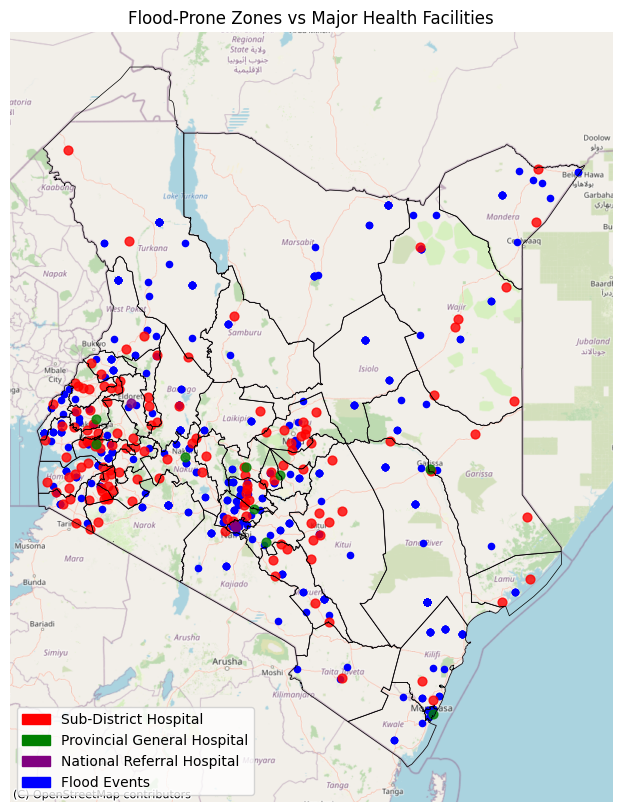

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import matplotlib.patches as mpatches

df_floods = df_disaster_inventory[df_disaster_inventory['event_'] == 'FLOOD'].copy()
gdf_floods = gpd.GeoDataFrame(
    df_floods,
    geometry=gpd.points_from_xy(df_floods['y'], df_floods['x']),
    crs="EPSG:4326"
)

df_health = df_health_facilities[
    df_health_facilities['Type'].isin([
        'Sub-District Hospital',
        'Provincial General Hospital',
        'National Referral Hospital'
    ])
]
gdf_health = gpd.GeoDataFrame(
    df_health,
    geometry=gpd.points_from_xy(df_health['Longitude'], df_health['Latitude']),
    crs="EPSG:4326"
)


gdf_counties = gdf_counties.to_crs(epsg=4326)
gdf_counties = gdf_counties.to_crs(epsg=3857)
gdf_floods   = gdf_floods.to_crs(epsg=3857)
gdf_health   = gdf_health.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(10, 10))
gdf_counties.boundary.plot(ax=ax, color="black", linewidth=0.5)

gdf_floods.plot(ax=ax, color="blue", markersize=20, label="Flood Events")
colors = {
    'Sub-District Hospital': 'red',
    'Provincial General Hospital': 'green',
    'National Referral Hospital': 'purple'
}

for t, color in colors.items():
    gdf_health[gdf_health['Type'] == t].plot(
        ax=ax, markersize=40, color=color, alpha=0.8, label=t
    )

ctx.add_basemap(ax, crs=gdf_health.crs, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Flood-Prone Zones vs Major Health Facilities", fontsize=12)
ax.axis("off")

handles = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
handles.append(mpatches.Patch(color='blue', label='Flood Events'))
ax.legend(handles=handles, loc='lower left')

plt.show()


## Calculating Distance of Hospitals to Flood zones
This analysis helps prioritize emergency planning, resource allocation, and response strategies by showing which hospitals are most vulnerable to floods.


In [ ]:
gdf_health = gdf_health.to_crs(epsg=3857)
gdf_floods = gdf_floods.to_crs(epsg=3857)

gdf_health['distance_to_flood_m'] = gdf_health.geometry.apply(
    lambda x: gdf_floods.distance(x).min()
)
gdf_health.sort_values(by="distance_to_flood_m", ascending=True,inplace=True)
(gdf_health[['County', 'Type', 'distance_to_flood_m']]).head(20)

,County,Type,distance_to_flood_m
5672,Baringo,Sub-District Hospital,603.700150
9628,Elegeyo-Marakwet,Sub-District Hospital,1042.676152
5832,Kakamega,Sub-District Hospital,1144.318022
8649,Kakamega,Sub-District Hospital,1295.817847
3771,Migori,Sub-District Hospital,1387.356905
6999,Kakamega,Sub-District Hospital,2239.819249
2693,Kitui,Sub-District Hospital,2242.870864
1216,Mombasa,Provincial General Hospital,2464.415280
4171,Kirinyaga,Sub-District Hospital,2472.668942
4278,Murang'A,Sub-District Hospital,3198.325962


In [ ]:
df_disaster_inventory.columns

Index(['objectid', 'event_', 'county', 'district_', 'division_', 'date_',
       'place', 'deaths_', 'injured_', 'missing_', 'houses_destroyed_',
       'houses_damaged_', 'victims_', 'affected_', 'relocated_', 'evacuated_',
       'losses__usd_', 'losses__local_', 'education_centers_', 'hospitals_',
       'damages_in_crops_ha__', 'lost_cattle_', 'damages_in_roads_mts_',
       'comments', 'responder__military_', 'responder__police_',
       'responder__red_cross_', 'responder__mosp_',
       'responder__nairobi_fire_brigade', 'responder__kplc_',
       'responder__unicef_', 'responder__saint_john_ambulance',
       'responder__irc_', 'other_responders_', 'house__iron_sheet_',
       'house__wooden_', 'house__mud_', 'house__grass_thatched_',
       'house__tent_', 'x', 'y', 'constituency_gis', 'county_centriod',
       'County'],
      dtype='object')

In [ ]:
import geopandas as gpd
import pandas as pd
import osmnx as ox

gdf_health = gpd.GeoDataFrame(
    df_health_facilities,
    geometry=gpd.points_from_xy(df_health_facilities['Longitude'], df_health_facilities['Latitude']),
    crs="EPSG:4326"
)

# Filter only flood events
df_floods = df_disaster_inventory[df_disaster_inventory['event_'] == 'FLOOD'].copy()

# Drop rows with missing coordinates just in case
df_floods = df_floods.dropna(subset=['x', 'y'])

# Convert to GeoDataFrame
gdf_floods = gpd.GeoDataFrame(
    df_floods,
    geometry=gpd.points_from_xy(df_floods['x'], df_floods['y']),
    crs="EPSG:4326"
)

# print("Flood GeoDataFrame created:", gdf_floods.shape)

# Remove the line that attempts to create a GeoDataFrame from df_population
# gdf_population = gpd.GeoDataFrame(df_population, geometry=gpd.points_from_xy(df_population['x'], df_population['y']), crs="EPSG:4326")

G = ox.graph_from_place("Nyeri, Kenya", network_type='drive')
G = ox.project_graph(G)  # project to meters for distance calculations

In [ ]:
gdf_health = gdf_health.to_crs(epsg=3857)
gdf_floods = gdf_floods.to_crs(epsg=3857)

gdf_health['distance_to_flood_m'] = gdf_health.geometry.apply(
    lambda x: gdf_floods.distance(x).min()
)

hosp_nodes = [ox.distance.nearest_nodes(G, geom.x, geom.y) for geom in gdf_health.geometry]
flood_nodes = [ox.distance.nearest_nodes(G, geom.x, geom.y) for geom in gdf_floods.geometry]

In [ ]:
import networkx as nx

# distances = []
# for h_node, h_row in zip(hosp_nodes, gdf_health.itertuples()):
#     min_dist = float('inf')
#     for f_node in flood_nodes:
#         try:
#             length = nx.shortest_path_length(G, h_node, f_node, weight='length')
#             if length < min_dist:
#                 min_dist = length
#         except nx.NetworkXNoPath:
#             continue
#     distances.append(min_dist)

# gdf_health['road_distance_to_flood_m'] = distances

# flood_nodes: list of node IDs for flood locations
# G: your road network graph

# Compute shortest distance from any flood node to all nodes
dist_to_flood = nx.multi_source_dijkstra_path_length(G, sources=flood_nodes, weight='length')

# Assign distances to hospitals
distances = [dist_to_flood.get(h_node, float('inf')) for h_node in hosp_nodes]

gdf_health['road_distance_to_flood_m'] = distances



In [ ]:
df_population.head()

,county,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019,County
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13,Baringo
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23,Bomet
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35,Bungoma
3,Busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28,Busia
4,Elgeyo-Marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12,Elgeyo-Marakwet


In [ ]:
# gdf_health['pop_demand_norm'] = df_population['Total_Population19'] / df_population['Total_Population19'].max()


In [ ]:
threshold_m = 5000  # 5 km road distance
gdf_health['accessible'] = gdf_health['road_distance_to_flood_m'] <= threshold_m


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ['distance_to_flood_m', 'road_distance_to_flood_m']#, 'beds_norm', 'pop_demand_norm']
X = gdf_health[features]
y = gdf_health['accessible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2003

    accuracy                           1.00      2003
   macro avg       1.00      1.00      1.00      2003
weighted avg       1.00      1.00      1.00      2003



In [ ]:
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# Travel time = road_distance / average_speed
gdf_health['travel_time_min'] = gdf_health['road_distance_to_flood_m'] / 1000 / 40 * 60  # 40 km/h avg


/tmp/ipython-input-2780760418.py:7: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_health[gdf_health['accessible']].plot(ax=ax, color='green', markersize=50, label='Accessible')


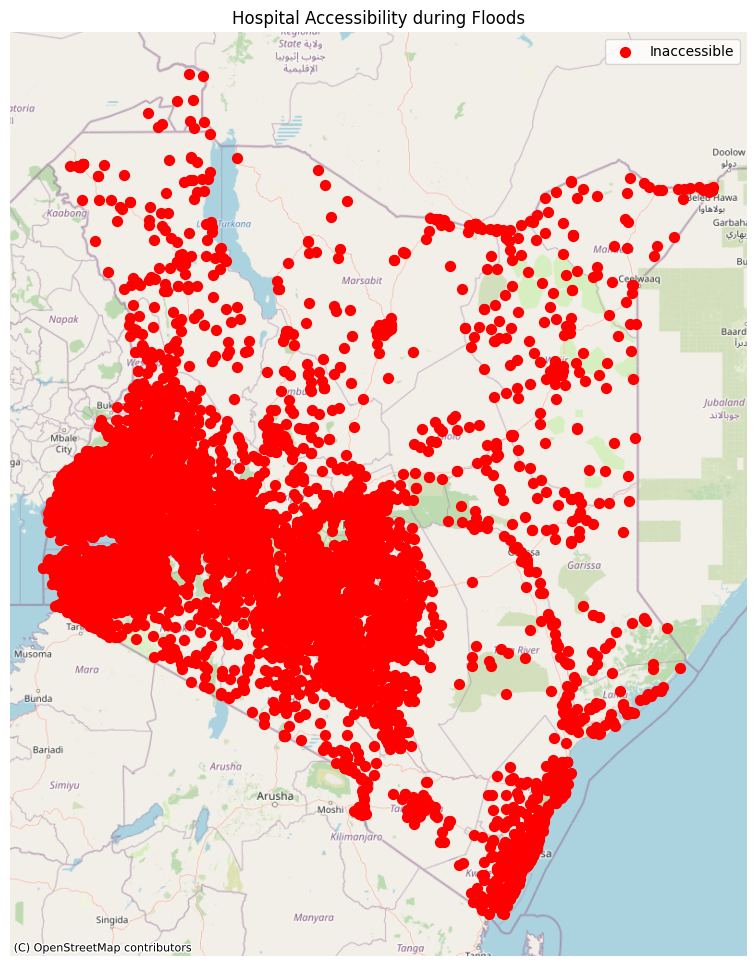

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

gdf_health = gdf_health.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(12,12))

gdf_health[gdf_health['accessible']].plot(ax=ax, color='green', markersize=50, label='Accessible')
gdf_health[~gdf_health['accessible']].plot(ax=ax, color='red', markersize=50, label='Inaccessible')

ctx.add_basemap(ax, crs=gdf_health.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Hospital Accessibility during Floods")
ax.axis("off")
plt.legend()
plt.show()


In [ ]:
import numpy as np
# import fynesse

# Assume df_health and gdf_health already exist
# Create a feature table for hospitals and flood proximity
hospital_features = df_health_facilities.copy()
hospital_features['distance_to_flood_m'] = gdf_health['distance_to_flood_m']  # computed earlier

# Print columns of df_population to verify
print("Columns in df_population:", df_population.columns.tolist())

# Merge population data to get population density by county
hospital_features = hospital_features.merge(
    df_population[['County', 'Population Density']], on='County', how='left'
)

# Convert 'Population Density' to numeric, coercing errors
hospital_features['Population Density'] = pd.to_numeric(
    hospital_features['Population Density'], errors='coerce'
)


hospital_features['population_density'] = hospital_features['Population Density']  # from census

# Compute sparsity
feature_sparsity = hospital_features.isin([0, np.nan]).mean()
sparse_features = feature_sparsity[feature_sparsity > 0.99].index.tolist()

# Prepare data for plotting
feature_plot_data = hospital_features[sparse_features + ['OBJECTID', 'population_density', 'distance_to_flood_m']]
# Merge coordinates if needed
feature_plot_data = feature_plot_data.merge(
    gdf_health[['OBJECTID', 'geometry']], on='OBJECTID', how='left'
)



Columns in df_population: ['county', 'Total_Population19', 'Male populatio 2019', 'Female population 2019', 'Households', 'Av_HH_Size', 'LandArea', 'Population Density', 'Population in 2009', 'Pop_change', 'Intersex population 2019', 'County']


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def plot_sparse_features_boxplots(
    feature_data: pd.DataFrame,
    targets: list,
    sparse_threshold: float = 0.99,
    feature_id: str = 'hospital_id',
    log_transform_targets: list = None,
    grid_cols: int = 5,
    figsize: tuple = (20,5)
):
    """
    Plot boxplots of sparse features vs target variables.

    Parameters
    ----------
    feature_data : pd.DataFrame
        DataFrame containing features (columns) and target variables.
    targets : list
        List of target variable columns to plot against.
    sparse_threshold : float
        Threshold for a feature to be considered sparse (not used for filtering here, optional).
    feature_id : str
        Unique identifier column for features/hospitals.
    log_transform_targets : list
        List of target columns to log-transform for better visualization.
    grid_cols : int
        Number of columns in the grid of plots.
    figsize : tuple
        Figure size.
    """

    if log_transform_targets is None:
        log_transform_targets = []

    # Identify sparse features (columns with > sparse_threshold missing or zero)
    feature_sparsity = feature_data.isin([0, np.nan]).mean()
    sparse_features = feature_sparsity[feature_sparsity > sparse_threshold].index.tolist()

    if len(sparse_features) == 0:
        print("No features exceed the sparsity threshold.")
        return

    # Prepare plot grid
    n_features = len(sparse_features)
    n_rows = math.ceil(n_features / grid_cols)

    fig, axes = plt.subplots(n_rows, grid_cols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(sparse_features):
        for target in targets:
            y = feature_data[target].copy()
            x = feature_data[feature].copy()

            if target in log_transform_targets:
                y = np.log1p(y)  # log(1 + y) to handle zeros

            axes[i].boxplot([y[x==val] for val in sorted(x.dropna().unique())],
                            labels=sorted(x.dropna().unique()))
            axes[i].set_title(f"{feature} vs {target}", fontsize=10)
            axes[i].set_xlabel(feature, fontsize=8)
            axes[i].set_ylabel(target, fontsize=8)
            axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_sparse_features_boxplots(
    feature_data=feature_plot_data,
    targets=['distance_to_flood_m', 'population_density'],
    sparse_threshold=0.99,
    feature_id='OBJECTID',
    log_transform_targets=['population_density'],
    grid_cols=5,
    figsize=(20,5)
)

No features exceed the sparsity threshold.


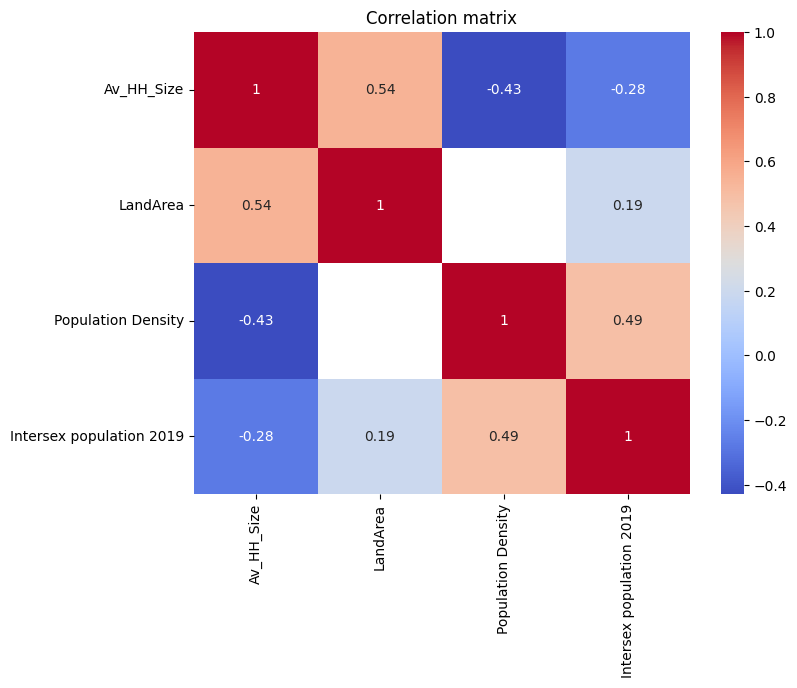

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe: merged hospital/flood/population data
# df = merged_hospital[['distance_to_flood_m', 'population_density', 'hospital_capacity']]

# Select only numeric columns for correlation calculation
numeric_df_population = df_population.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Compute correlation matrix
corr_matrix = numeric_df_population.corr()

# Visualize
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()